In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('C:\\Users\\Admin\\Downloads\\text_classification.csv')
df=pd.DataFrame(df)
df

,Text,Type
0,I love this sandwich,pos
1,this is an amazing place,pos
2,I feel very good about these beers,pos
3,this is my best work,pos
4,what an awesome view,pos
5,I do not like this restaurant,neg
6,I am tired of this stuff,neg
7,I can't deal with this,neg
8,he is my sworn enemy,neg
9,my boss is horrible,neg


In [24]:
train=df[:10]
test=df[10:]

In [58]:
l=list(df['Text'][df['Type']=='pos'])
s=[]
for i in l:
    s.extend(i.split(' '))
s=set(s)
s

df1=pd.DataFrame([[0]*len(s)]*len(train),columns=s)
df1

,holiday,is,will,this,fun,sandwich,place,love,to,very,...,about,best,we,these,amazing,beers,a,have,awesome,great
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
for i in range(len(train)):
    s=train['Text'][i].split(' ')
    for j in s:
        if j in df1.columns:
            df1[j][i]+=1
df1

,holiday,is,will,this,fun,sandwich,place,love,to,very,...,about,best,we,these,amazing,beers,a,have,awesome,great
0,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,1,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X

array([[0.4       , 1.        ],
       [1.        , 0.55555556],
       [0.6       , 0.66666667]])

In [25]:
import numpy as np
X = np.array(([2, 9], [5, 5], [3, 6]), dtype=float) # two inputs [sleep,study]
y = np.array(([92], [86], [89]), dtype=float)

X = X/np.amax(X,axis=0)
y = y/100

output=[]
#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

#Variable initialization
epoch=1000 #Setting training iterations
lr=0.1 #Setting learning rate
inputlayer_neurons = 2 #number of features in data set
hiddenlayer_neurons = 2 #number of hidden layers neurons
output_neurons = 1 #number of neurons at output layer

#weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons)) 
bh=np.random.uniform(size=(1,hiddenlayer_neurons)) 
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons)) #weight of the link from hidden node to output node
bout=np.random.uniform(size=(1,output_neurons)) #bias of the link from hidden node to output node


# draws a random range of numbers uniformly of dim x*y
for i in range(epoch):

#Forward Propogation
    hinp1=np.dot(X,wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+ bout
    output = sigmoid(outinp)

#Backpropagation
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO* outgrad
    EH = d_output.dot(wout.T)

#how much hidden layer weights contributed to error
    hiddengrad = derivatives_sigmoid(hlayer_act)
    d_hiddenlayer = EH * hiddengrad
    wout += hlayer_act.T.dot(d_output) *lr
    wh += X.T.dot(d_hiddenlayer) *lr
    bout += np.sum(d_output ) * lr
    bh += np.sum(EH) * lr

print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

Input: 
[[0.4        1.        ]
 [1.         0.55555556]
 [0.6        0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.89221416]
 [0.88903967]
 [0.88851194]]


In [ ]:
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)

X=X/np.amax(X,axis=0)
y=y/max(y)

epochs=int(input('No Of Epochs:'))
lr=int(input('learning rate:'))
inp_lay=int(input('No of input layers:'))
hid_lay=int(input("enter hidden layers:"))
out_lay=int(input('Output layers:'))

wi=np.random.uniform(size=(inp_lay,hid_lay))
bi=np.random.uniform(size=(1,hid_lay))
wo=np.random.uniform(size=(hid_lay,out_lay))
bo=np.random.uniform(size=(1,out_lay))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return x/(1-x)

for epoch in range(epochs):
    r1=np.dot(X,wi)
    r2=r1+bi
    r3=sigmoid(r2)
    r4=np.dot(r3,wo)
    r5=r4+bo
    r6=sigmoid(r5)

    err=y-r6
    out_grad=sigmoid_derivative(r6)
    eh_grad=out_grad*err
    fin=err.dot(wo.T)

    wo+=
    
    


In [4]:
import numpy as np

np.random.seed(42)  # Set a fixed seed for reproducibility

# Define the input and output data
input_data = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)  # Two inputs: [sleep, study]
output_data = np.array(([92], [86], [89]), dtype=float)  # One output: [Expected % in Exams]

# Scale the input data
input_data /= np.amax(input_data, axis=0)
output_data/=np.amax(output_data,axis=0)

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Variable initialization
epochs = 500  # Number of training iterations
learning_rate = 0.1  # Learning rate
input_neurons = 2  # Number of features in the input data
hidden_neurons = 3  # Number of neurons in the hidden layer
output_neurons = 1  # Number of neurons in the output layer

# Weight and bias initialization
hidden_weights = np.random.uniform(size=(input_neurons, hidden_neurons))
hidden_bias = np.random.uniform(size=(1, hidden_neurons))
output_weights = np.random.uniform(size=(hidden_neurons, output_neurons))
output_bias = np.random.uniform(size=(1, output_neurons))
# output_output=[]
# Training loop
for epoch in range(epochs):
    # Forward Propagation
    hidden_input = np.dot(input_data, hidden_weights) + hidden_bias
    hidden_output = sigmoid(hidden_input)
    output_input = np.dot(hidden_output, output_weights) + output_bias
    output_output = sigmoid(output_input)

    # Backpropagation
    output_error = output_data - output_output
    output_gradient = sigmoid_derivative(output_output) * output_error
    hidden_error = output_gradient.dot(output_weights.T)
    hidden_gradient = sigmoid_derivative(hidden_output) * hidden_error

    # Update weights and biases
    output_weights += hidden_output.T.dot(output_gradient) * learning_rate
    # output_bias += np.sum(output_gradient, axis=0, keepdims=True) * learning_rate
    hidden_weights += input_data.T.dot(hidden_gradient) * learning_rate
    # hidden_bias += np.sum(hidden_gradient, axis=0, keepdims=True) * learning_rate

# Print the results
print("Input:\n" + str(input_data))
print("Actual Output:\n" + str(output_data))
print("Predicted Output:\n", output_output)
print(hidden_weights,hidden_bias)


Input:
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output:
[[1.        ]
 [0.93478261]
 [0.9673913 ]]
Predicted Output:
 [[0.94777087]
 [0.9369626 ]
 [0.94942749]]
[[0.42593214 0.95801568 0.78626622]
 [0.65924905 0.16501285 0.22163032]] [[0.05808361 0.86617615 0.60111501]]


Text(0, 0.5, 'Petal Width')

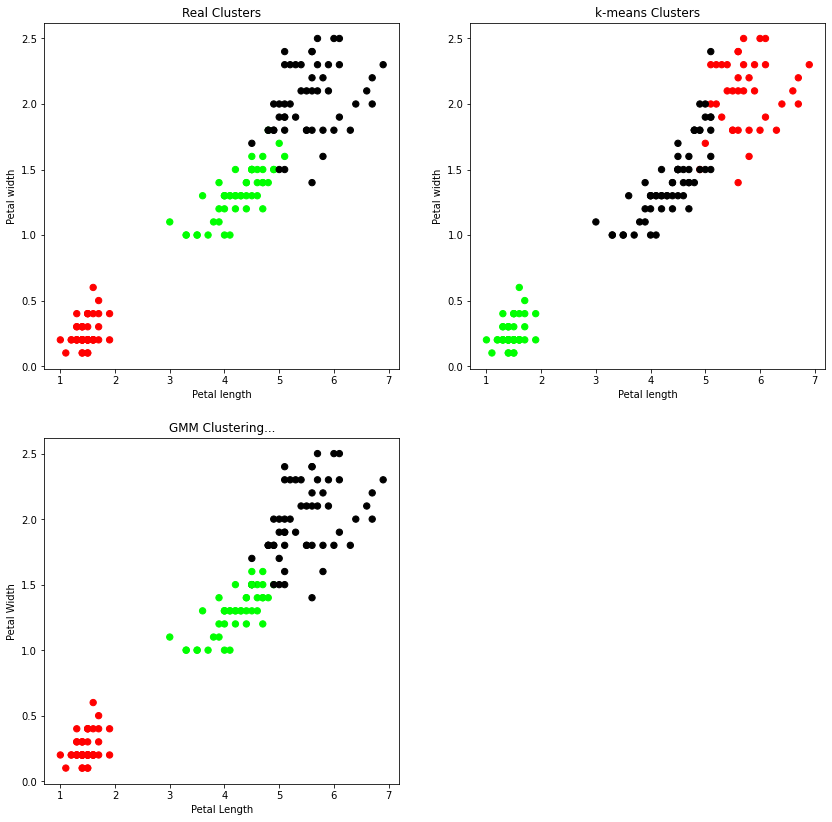

In [3]:
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
# import numpy as np
#importing iris data to perform...
iris=datasets.load_iris()
x=DataFrame(iris.data)
x.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=DataFrame(iris.target)
y.columns=['Targets']


#build k-Means model...
d=KMeans(n_clusters=3)
d.fit(x)

#now visualise the clustering results...
plt.figure(figsize=(14,14))
cmap=np.array(['red','lime','black'])


#now plot for the original classifications using petal features...
plt.subplot(2,2,1)
plt.scatter(x.Petal_Length,x.Petal_Width,c=cmap[y.Targets],s=40)
plt.title('Real Clusters')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.subplot(2,2,2)
plt.scatter(x.Petal_Length,x.Petal_Width,c=cmap[d.labels_],s=40)
plt.title('k-means Clusters')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
s=StandardScaler()
s.fit(x)
xsa=s.transform(x)
xs=DataFrame(xsa,columns=x.columns)

gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
gmmy=gmm.predict(xs)
plt.subplot(2,2,3)
plt.scatter(x.Petal_Length,x.Petal_Width,c=cmap[gmmy],s=40)
plt.title("GMM Clustering...")
plt.xlabel("Petal Length")
plt.ylabel('Petal Width')

In [34]:
gmmy


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a k-Nearest Neighbors classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Perform predictions on the test data
y_pred = knn.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
print("\nClassification Accuracy:",knn.score(X_test,y_test))
# Print the predictions along with the actual labels
print("\nAccuracy metrics:\n",metrics.classification_report(y_test,y_pred))


[[ 7  0  0]
 [ 0  7  2]
 [ 0  0 14]]

Classification Accuracy: 0.9333333333333333

Accuracy metrics:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.78      0.88         9
           2       0.88      1.00      0.93        14

    accuracy                           0.93        30
   macro avg       0.96      0.93      0.94        30
weighted avg       0.94      0.93      0.93        30



In [4]:
import math
import pandas as pd

def calculate_entropy(data):
    """Calculate the entropy of a given dataset"""
    total_samples = len(data)
    label_counts = data['label'].value_counts()
    entropy = 0

    for count in label_counts:
        probability = count / total_samples
        entropy -= probability * math.log2(probability)

    return entropy


def calculate_information_gain(data, attribute):
    """Calculate the information gain for a given attribute"""
    total_samples = len(data)
    attribute_values = data[attribute].unique()
    entropy = calculate_entropy(data)
    information_gain = entropy

    for value in attribute_values:
        subset = data[data[attribute] == value]
        subset_entropy = calculate_entropy(subset)
        subset_samples = len(subset)
        information_gain -= (subset_samples / total_samples) * subset_entropy

    return information_gain


def get_best_attribute(data, attributes):
    """Get the attribute with the highest information gain"""
    information_gains = {}

    for attribute in attributes:
        information_gain = calculate_information_gain(data, attribute)
        information_gains[attribute] = information_gain
    
    best_attribute = max(information_gains, key=information_gains.get) # type: ignore
    
    return best_attribute


def create_decision_tree(data, attributes, target_attribute):
    """Create a decision tree recursively using the ID3 algorithm"""
    # Base cases
    # If all samples have the same label, return a leaf node with that label
    if len(data['label'].unique()) == 1:
        return data['label'].iloc[0]
    # If there are no attributes left, return the majority label
    if len(attributes) == 0:
        majority_label = data['label'].value_counts().idxmax()
        # print(majority_label)
        return majority_label

    # Recursive case
    best_attribute = get_best_attribute(data, attributes)
    tree = {best_attribute: {}}
    remaining_attributes = [attr for attr in attributes if attr != best_attribute]

    for value in data[best_attribute].unique():
        subset = data[data[best_attribute] == value]
        subset = subset.drop(best_attribute, axis=1)
        subtree = create_decision_tree(subset, remaining_attributes, target_attribute)
        tree[best_attribute][value] = subtree

    return tree


def classify_sample(sample, tree):
    """Classify a new sample using the decision tree"""
    if isinstance(tree, str):
        return tree

    attribute = list(tree.keys())[0]
    subtree = tree[attribute].get(sample[attribute])

    if subtree is None:
        return "Unknown"

    return classify_sample(sample, subtree)


# Create a sample dataset for demonstration
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'label': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

attributes = list(df.columns)
attributes.remove('label')

# Build the decision tree
decision_tree = create_decision_tree(df, attributes, 'label')
print(decision_tree)
# Print the decision tree
def print_tree(tree, indent=''):
    if isinstance(tree, str):
        print(tree)
    else:
        attribute = list(tree.keys())[0]
        print(attribute)
        for value, subtree in tree[attribute].items():
            print(f"{indent} {attribute} = {value}: ", end='')
            print_tree(subtree, indent + '  ')

# print_tree(decision_tree)

# Classify a new sample
new_sample = {
    'Outlook': 'Sunny',
    'Temperature': 'Cool',
    'Humidity': 'Normal',
    'Wind': 'Strong'
}

# classification = classify_sample(new_sample, decision_tree)
# print(f"Classification: {classification}")


{'Outlook': {'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}, 'Overcast': 'Yes', 'Rainy': {'Wind': {'Weak': 'Yes', 'Strong': 'No'}}}}


In [2]:
import pandas as pd
import math

def entropy(data):
    le=len(data)
    cou=data.value_counts()
    ent=0
    for val in cou:
        ent-=(val/cou)*math.log2(val/cou)
    return cou
        

def info_gain(data,cols):
    attr=data[cols].unique()
    tot=len(data)
    ig=entropy(data)
    for i in attr:
        subset=data[data[cols]==i]
        ent=entropy(subset)
        le=len(subset)
        ig-=(le/tot)*ent
    return ig


def get_best(data,attr):
    information_g={}
    for i in attr:
        information_g[i]=info_gain(data,i)
    return max(information_g,key=information_g.get)

def create_tree(df,att,target):
    if len(df['label'].unique())==1:
        return df['label'].iloc[0]
    if (len(att)==0):
        return df['label'].value_counts().idxmax()
    best_aatr=get_best(data,att)
    tree={best_aatr:{}}
    remain=[i for i in att if i!=target]

    for i in df[best_aatr].unique():
        subset=df[df[best_aatr]==i]
        subset=subset.drop(best_aatr,axis=1)
        subtree=create_tree(subset,remain,target)
        tree[best_aatr][i]=subtree
    return tree

data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'label': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

attributes = list(df.columns)
attributes.remove('label')

# Build the decision tree
decision_tree = create_tree(df, attributes, 'label')

print(decision_tree)

AttributeError: 'list' object has no attribute 'unique'

In [61]:

classification = classify_sample(new_sample, decision_tree)

# classification

{'Outlook': {'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}, 'Overcast': 'Yes', 'Rainy': {'Wind': {'Weak': 'Yes', 'Strong': 'No'}}}}
{'Humidity': {'High': 'No', 'Normal': 'Yes'}}
{'Humidity': {'High': 'No', 'Normal': 'Yes'}}
No


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def locally_weighted_regression(X, y, query_point, tau):
    m = X.shape[0]
    weights = np.exp(-np.sum((X - query_point) ** 2, axis=1) / (2 * tau ** 2))
    theta = np.linalg.inv(X.T @ (weights[:, np.newaxis] * X)) @ (X.T @ (weights[:, np.newaxis] * y))
    return theta


# Load the dataset from a CSV file
data = pd.read_csv('C:\\Users\\Admin\\Downloads\\10-dataset.csv')
X=data['total_bill']
y=data['tip']

X=np.mat(X)
y=np.mat(y)
# Set the bandwidth parameter (tau)
tau = 0.5

# Perform locally weighted regression
y_pred = []
for query_point in X:
    theta = locally_weighted_regression(X, y, query_point, tau)
    y_predicted = np.dot(np.hstack((1, query_point)), theta)
    y_pred.append(y_predicted)

# Plot the results
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Locally Weighted Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Locally Weighted Regression')
plt.legend()
plt.show()

ValueError: No axis named 1 for object type Series

In [15]:
for i,j in data.iterrows():
    print(j[3])

No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
Yes
No
Yes
Yes
Yes
Yes
No
No
No
Yes
No
Yes
No
No
Yes
Yes
No
No
Yes
No
No
No
Yes
No
No
Yes
No
No
No
No
No
No
Yes
No
Yes
Yes
No
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
No
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
No
No
Yes
Yes
Yes
No
No
Yes
No
Yes
Yes
No
No
Yes
Yes
No
No


In [9]:
import pandas as pd
from math import log2

# Sample dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

def entropy(series):
    value_counts = series.value_counts()
    p_values = value_counts / len(series)
    return -sum(p * log2(p) for p in p_values)

def information_gain(df, attribute, target_column):
    total_entropy = entropy(df[target_column])
    grouped_entropy = df.groupby(attribute)[target_column].apply(entropy)
    p_values = df[attribute].value_counts() / len(df)
    weighted_entropy = sum(p * grouped_entropy for p, grouped_entropy in zip(p_values, grouped_entropy))
    return total_entropy - weighted_entropy

def id3(df, target_column, attributes):
    if len(df[target_column].unique()) == 1:
        return df[target_column].iloc[0]
    
    if len(attributes) == 0:
        return df[target_column].value_counts().idxmax()
    
    best_attribute = max(attributes, key=lambda a: information_gain(df, a, target_column))
    tree = {best_attribute: {}}
    
    for value, subset in df.groupby(best_attribute):
        remaining_attributes = [a for a in attributes if a != best_attribute]
        subtree = id3(subset, target_column, remaining_attributes)
        tree[best_attribute][value] = subtree
    
    return tree

attributes = list(df.columns)[:-1]
target_column = 'Play'
decision_tree = id3(df, target_column, attributes)

print("Decision Tree:")
print(decision_tree)

# Query for prediction
query = {
    'Outlook': 'Sunny',
    'Temperature': 'Mild',
    'Humidity': 'High',
    'Wind': 'Weak'
}
def predict(query, decision_tree):
    for attribute, subtree in decision_tree.items():
        value = query[attribute]
        if value in subtree:
            if isinstance(subtree[value], dict):
                return predict(query, subtree[value])
            else:
                return subtree[value]
predicted_play = predict(query, decision_tree)
print("Predicted Play:", predicted_play)


Decision Tree:
{'Outlook': {'Overcast': 'Yes', 'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}}, 'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}
Predicted Play: No


In [1]:
import pandas as pd
df=pd.read_csv('C:\\Users\\Admin\\Downloads\\weather.csv')
df=pd.DataFrame(df)
df

,Example,Sky,AirTemp,Humidity,Wind,Water,Forecast,EnjoySport
0,1,sunny,warm,normal,strong,warm,same,yes
1,2,sunny,warm,high,strong,warm,same,yes
2,3,rainy,cold,high,strong,warm,change,no
3,4,sunny,warm,high,strong,cool,change,yes


In [20]:
# df.drop(columns='Example',inplace=True)
l=list(df[df['EnjoySport']=='yes'].iloc[0])

for i in df.iterrows():
    l1=list(i[1])
    if l1[-1]=='yes':
        for i in range(len(l)):
            if l[i]!=l1[i]:
                l[i]='?'
print(l[:-1])

['sunny', 'warm', '?', 'strong', '?', '?']


In [24]:
df=pd.read_csv('C:\\Users\\Admin\\Downloads\\bayesian.csv')
df=pd.DataFrame(df)
df

,Outlook,Temperature,Humidity,Windy,Class
0,sunny,hot,high,False,N
1,sunny,hot,high,True,N
2,overcast,hot,high,False,P
3,rain,mild,high,False,P
4,rain,cool,normal,False,P
5,rain,cool,normal,True,N
6,overcast,cool,normal,True,P
7,sunny,mild,high,False,N
8,sunny,cool,normal,False,P
9,rain,mild,normal,False,P


In [39]:
d={}
P=len(df[df['Class']=='P'])
N=len(df[df['Class']=='N'])
for i in df.columns:
    s=set(df[i])
    for j in s:
        n1=len(df[(df[i]==j) & (df['Class']=='P')]['Class'])/P
        n2=len(df[(df[i]==j) & (df['Class']=='N')]['Class'])/N
        d[j]=[n1,n2]
print(d)

{'overcast': [0.4444444444444444, 0.0], 'sunny': [0.2222222222222222, 0.6], 'rain': [0.3333333333333333, 0.4], 'mild': [0.4444444444444444, 0.4], 'cool': [0.3333333333333333, 0.2], 'hot': [0.2222222222222222, 0.4], 'normal': [0.6666666666666666, 0.2], 'high': [0.3333333333333333, 0.8], False: [0.6666666666666666, 0.4], True: [0.3333333333333333, 0.6], 'P': [1.0, 0.0], 'N': [0.0, 1.0]}


In [56]:
for i in df[10:].iterrows():
    l=list(i[1][:-1])
    prob_y=P/len(df)
    prob_n=N/len(df)
    for j in l:
        prob_y*=d[j][0]
        prob_n*=d[j][1]
    if (prob_y>=prob_n):
        print('P')
    else:
        print('N')

P
P
P
N


In [58]:
df=pd.read_csv('C:\\Users\\Admin\\Downloads\\text_classification.csv')
df=pd.DataFrame(df)
df=df[:13]
df

,Text,Type
0,I love this sandwich,pos
1,this is an amazing place,pos
2,I feel very good about these beers,pos
3,this is my best work,pos
4,what an awesome view,pos
5,I do not like this restaurant,neg
6,I am tired of this stuff,neg
7,I can't deal with this,neg
8,he is my sworn enemy,neg
9,my boss is horrible,neg


In [70]:
l=[]
for i in df[df['Type']=='pos']['Text']:
    l.extend(i.split())
s1=set(l)
d={}
for i in s1:
    d[i]=l.count(i)

tot=len(s)+sum(d.values())

for i in d:
    d[i]=(d[i]+1)/tot
print(d)


l=[]
for i in df[df['Type']=='neg']['Text']:
    l.extend(i.split())
s1=set(l)
d1={}
for i in s1:
    d1[i]=l.count(i)

tot=len(s)+sum(d1.values())

for i in d1:
    d1[i]=(d1[i]+1)/tot
print(d1)

{'very': 0.05405405405405406, 'I': 0.10810810810810811, 'this': 0.13513513513513514, 'view': 0.05405405405405406, 'beers': 0.05405405405405406, 'work': 0.05405405405405406, 'to': 0.05405405405405406, 'sandwich': 0.05405405405405406, 'my': 0.05405405405405406, 'feel': 0.05405405405405406, 'awesome': 0.08108108108108109, 'love': 0.08108108108108109, 'an': 0.10810810810810811, 'is': 0.10810810810810811, 'dance': 0.05405405405405406, 'good': 0.05405405405405406, 'about': 0.05405405405405406, 'what': 0.05405405405405406, 'amazing': 0.05405405405405406, 'best': 0.05405405405405406, 'place': 0.08108108108108109, 'these': 0.05405405405405406}
{'juice': 0.05405405405405406, 'like': 0.08108108108108109, 'deal': 0.05405405405405406, 'he': 0.05405405405405406, 'horrible': 0.05405405405405406, 'not': 0.05405405405405406, 'I': 0.13513513513513514, 'this': 0.13513513513513514, 'my': 0.08108108108108109, 'enemy': 0.05405405405405406, 'do': 0.05405405405405406, 'donot': 0.05405405405405406, 'sworn': 0.